In [2]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np
%matplotlib inline

In [3]:
def swc_to_dataframe( file_name ) :
    col_names = ['id', 'type', 'x', 'y', 'z', 'radius', 'parent', 'seg_id', 'level', 'mode', 'timestamp', 'TFresindex']
    df = pd.read_csv( file_name, sep=r"\s+", comment = "#", names = col_names, index_col = 'id')
    return df

In [4]:
def make_figure( filtered, views, title="" ) :
    
    plt.rcParams["figure.figsize"] = (30,8)
    fig, axs = plt.subplots(1,3)

    for vk, vv in views.items() :

        x = filtered[vv['x']].values
        y = filtered[vv['y']].values

        axs[vv['order']].scatter( x, y, s=0.005, c='red')
        axs[vv['order']].set_aspect('equal')
        axs[vv['order']].invert_yaxis()
        
    fig.suptitle(title)
    

In [5]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)

In [6]:
#model_directory = "/allen/programs/celltypes/workgroups/mousecelltypes/_UPENN_fMOST"

model_directory = "C:/Users/lydia/OneDrive/Work/DigitalAssets/_UPENN_fMOST\HUSTReproduction_9_7_2021"
set0_directory = os.path.join( model_directory, "Original", "182709_ByHUST_original_sent" )
set1_directory = os.path.join( model_directory, "TransformedByHUST", "182709_RegisteredByHUST","182709_RegisteredByHUST" )
set2_directory = os.path.join( model_directory, "RescaledByAIBS", "182709_converted", "downscaled")

In [14]:
swc0_file = os.path.join( set0_directory, "182709_1392-X9267-Y12144.swc")
bname = os.path.basename( swc0_file ).split('.')[0]
swc1_file = os.path.join( set1_directory, "%s_reg.swc" % bname )
swc2_file = os.path.join( set2_directory, "%s_reg_xy25z25.swc" % bname )

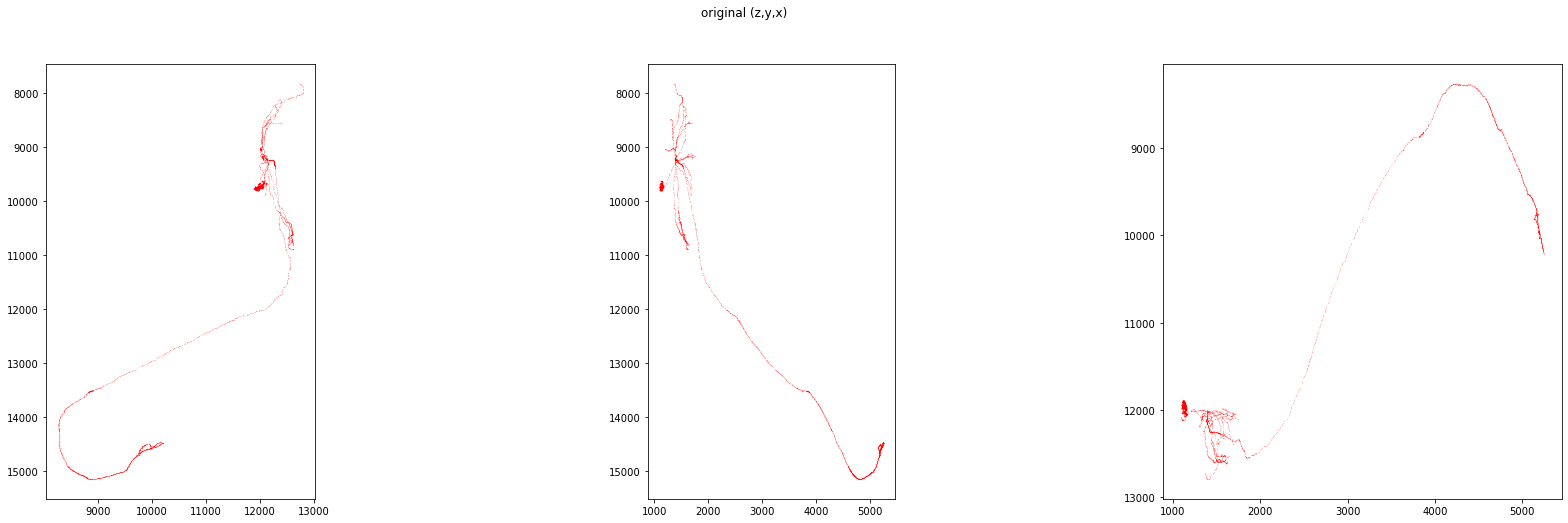

In [15]:
swc0 = swc_to_dataframe(swc0_file)
views0 = {}
views0['coronal'] = {'order': 0, 'x': 'y', 'y': 'x'} #z slice index
views0['sagittal'] = {'order': 1, 'x': 'z', 'y' : 'x'} #y high-res pixel index
views0['horizontal'] = {'order': 2, 'x': 'z', 'y' : 'y'} #x high-res pixel index
fig0 = make_figure(swc0, views0, "original (z,y,x)")

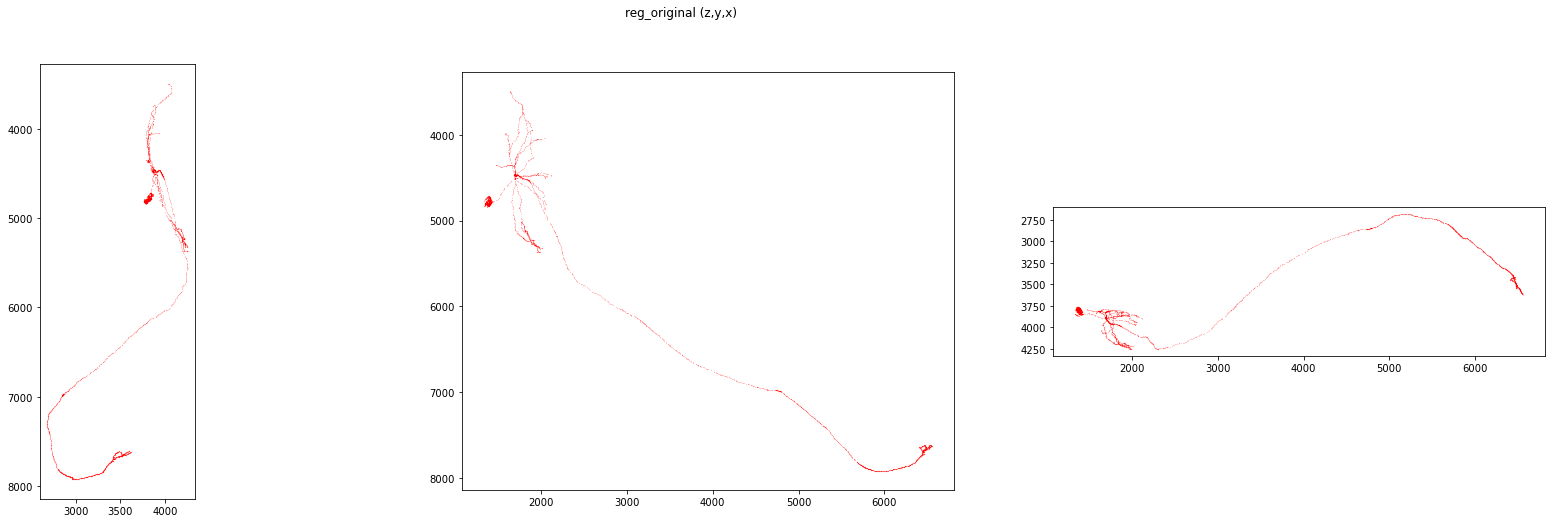

In [16]:
swc1 = swc_to_dataframe(swc1_file)
views1 = {}
views1['coronal'] = {'order': 0, 'x': 'y', 'y': 'x'} #z micron
views1['sagittal'] = {'order': 1, 'x': 'z', 'y' : 'x'} #y micron
views1['horizontal'] = {'order': 2, 'x': 'z', 'y' : 'y'} #x micron
fig1 = make_figure(swc1, views1, "reg_original (z,y,x)")

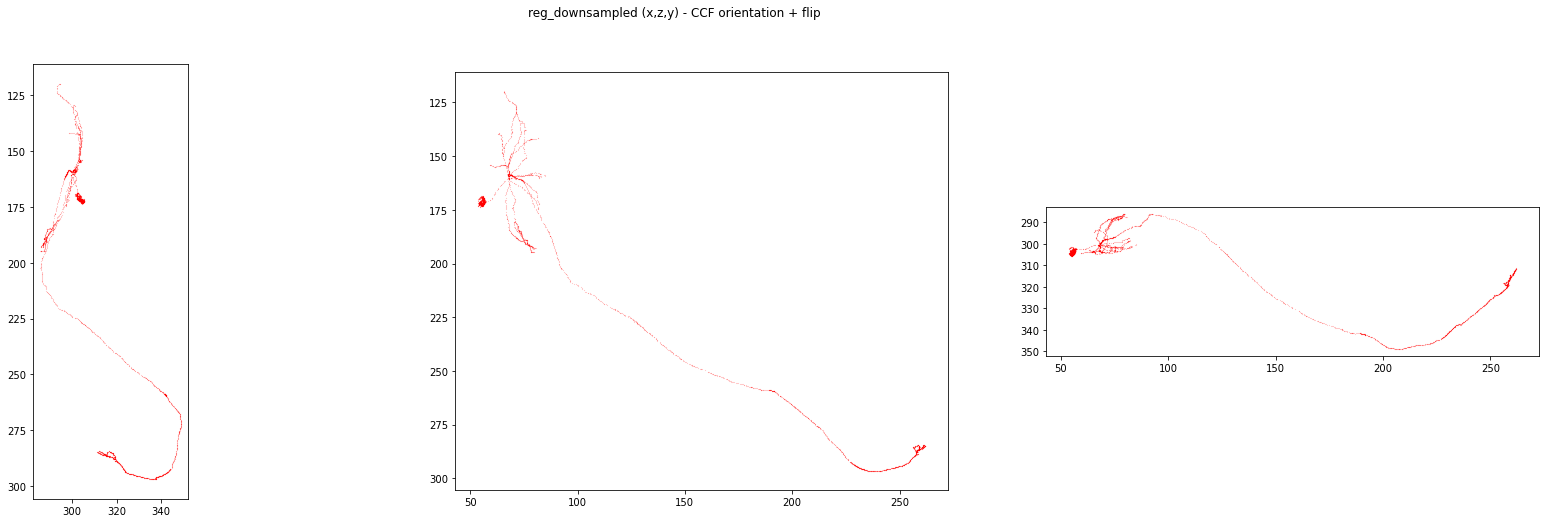

In [17]:
swc2 = swc_to_dataframe(swc2_file)
views2 = {}
views2['coronal'] = {'order': 0, 'x': 'z', 'y': 'y'} #x 25 micron CCF index
views2['sagittal'] = {'order': 1, 'x': 'x', 'y' : 'y'} #z 25 micron CCF index 
views2['horizontal'] = {'order': 2, 'x': 'x', 'y' : 'z'} #y 25 micron CCF index (flipped)
fig2 = make_figure(swc2,views2,"reg_downsampled (x,z,y) - CCF orientation + flip")

In [18]:
estimate_coef(swc2['x'],swc1['z']) #coronal - as expected

(0.000374723015283962, 24.999998800721375)

In [19]:
estimate_coef(swc2['y'],swc1['x']) #horizontal - note the shift

(499.9999676079051, 24.999999959093834)

In [20]:
estimate_coef(swc2['z'],swc1['y']) #sagittal - note the flip

(11399.998894976816, -24.999996166667692)